# Moods - Happy and Sad Clusters

## Methodology

* Create on Spotify 2 playlists Happy and Sad aggregating random user playlists (with Happy and Sad keywords)
* Extract the tracks and the Valence and Energy features
* Print the dataset with a hue for Happy and Sad songs
* Visualize the two clusters

In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
client_id = ' '
client_secret = ' '
username = ' '
redirect_uri = ' '
scope = ' '

In [3]:
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)

print("...connecting to Spotify")

sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

if sp:
    pass
else:
    print("...error connecting")

...connecting to Spotify


In [4]:
playlists = sp.user_playlists(username)

playlist_names = ["Happy", "Sad"]

In [5]:
#Happy and Sad tracks with their ID
tracklist = []

for playlist in playlists['items']:
    
    if playlist['name'] in playlist_names:
        print (playlist['name'], 'nb of tracks: ', playlist['tracks']['total'])
        
        results = sp.user_playlist(username, playlist['id'],
                                   fields="tracks, next")
        
        tracks = results['tracks']

        for i, item in enumerate(tracks['items']):
            track = item['track']
            tracklist.append(dict(playlist=playlist['name'],
                                  name=track['name'], 
                                  track_id=track['id']))

        while tracks['next']:
            tracks = sp.next(tracks)
            for i, item in enumerate(tracks['items']):
                track = item['track']
                tracklist.append(dict(playlist=playlist['name'],
                                      name=track['name'], 
                                      track_id=track['id']))
            
print("There are ", len(tracklist), " songs in the tracklist")

Sad nb of tracks:  527
Happy nb of tracks:  543
There are  1070  songs in the tracklist


In [6]:
#Getting Audio Features: Valence and Energy
tracks_features = []

for track in tracklist:
    features = sp.audio_features([track['track_id']])
    if not features:
        print("passing track ", track['name'])
        pass
    else:
        f = features[0]
        tracks_features.append(dict(playlist=track['playlist'],
                                    name=track['name'],
                                    track_id=track['track_id'],
                                    valence=f['valence'],
                                    energy=f['energy']
                                    ))

retrying ...4secs
retrying ...3secs
retrying ...1secs
retrying ...3secs
retrying ...1secs
retrying ...3secs
retrying ...1secs
retrying ...3secs
retrying ...1secs
retrying ...4secs
retrying ...4secs
retrying ...1secs
retrying ...3secs
retrying ...1secs
retrying ...3secs
retrying ...1secs


In [7]:
df = pd.DataFrame(tracks_features)
df.head()

,playlist,name,track_id,valence,energy
0,Sad,The A Team,2vBF8A6n0REigm7RSUM65S,0.3660,0.286
1,Sad,Breathe Me,7jqzZyJJLrpkRFYGpkqSK6,0.2120,0.643
2,Sad,Falling,1ZMiCix7XSAbfAJlEZWMCp,0.0592,0.267
3,Sad,Skinny Love,1NyFRrFiJAJIaR6icj1goI,0.1030,0.256
4,Sad,Youth,1JDMO4EVPHtm0xXhJb2IjR,0.4880,0.477


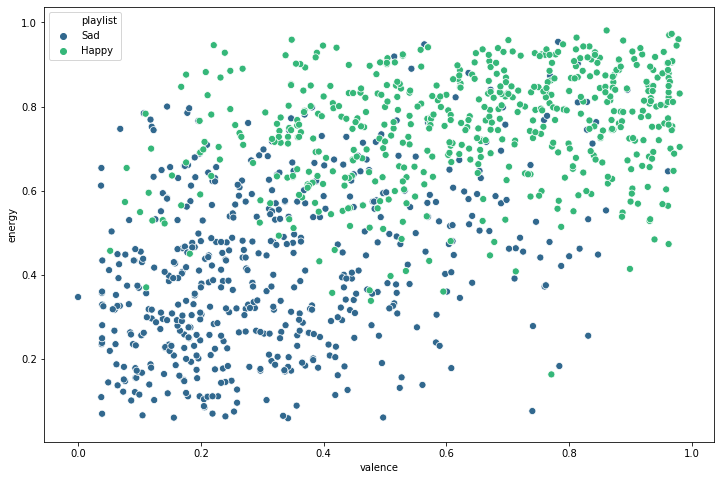

In [8]:
#Scatter plot
plt.figure(figsize=(12,8))
sns.scatterplot(x='valence', y='energy', data=df, hue='playlist', palette='viridis', s=50)

## Results
* Two clusters
* Several Outliers, mostly with "Sad" Songs but we chose completly random playlists
* It would be interesting to use those two features with other emotions (Thayer's 2D model)

Next steps: Add more songs to the playlists and test classification models with more audio features that could help differentiating even further the two clusters. 

In [9]:
#Quick and Dirty Model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

X = df[['valence', 'energy']]
y = df['playlist']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

In [10]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

pred = logmodel.predict(X_test)

print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

       Happy       0.91      0.91      0.91       117
         Sad       0.90      0.89      0.89        97

    accuracy                           0.90       214
   macro avg       0.90      0.90      0.90       214
weighted avg       0.90      0.90      0.90       214

[[107  10]
 [ 11  86]]
